Problem 1
==================

In [1]:
import numpy as np
import math
from numpy import linalg as la
from scipy import linalg as sla

def getcondition(A):
    
    svvec = sla.svdvals(A)
    svmax = np.max(svvec)
    svmin = np.min(svvec)
    
    if svmin == 0:
        cond_num = np.inf
    else:
        cond_num = svmax / svmin 
    
    return cond_num

A = (np.arange(1,10)).reshape(3,3)
cond_num = getcondition(A)

print(cond_num)

5.05227944454e+16


Problem 2
==================

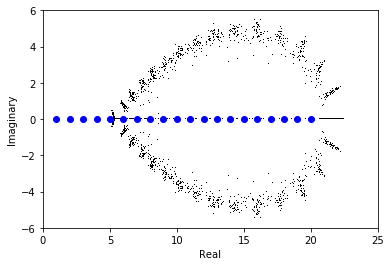

4.84123542925
3.34136253881e+18


In [33]:
import sympy as sy
from matplotlib import pyplot as plt


def argand(a):
    for x in range(len(a)):
        plt.plot(a[x].real,a[x].imag,',k',label='python')
    
def argand_actual(a):
    for x in range(len(a)):
        plt.plot(a[x].real,a[x].imag,'ob',label='python')

def experiment(n):
    
    absvec = np.empty((n))
    rvvec = np.empty((n))
    
    for j in range (0, n):
        w_roots = np.arange(1, 21)
    
        # Get the exact Wilkinson polynomial coefficients using SymPy.
        x, i = sy.symbols('x i')
        w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
        w_coeffs = np.array(w.all_coeffs())
    
        # Perturb all of the coefficients very slightly.
    
        h = np.random.normal(loc=1.0, scale=1e-10, size=21)
        new_coeffs = w_coeffs * h
    
        # Use NumPy to compute the roots of the perturbed polynomial.
        new_roots = np.roots(np.poly1d(new_coeffs))
    
        #Plot roots 
        argand(new_roots)
        
        # Sort the roots to ensure that they are in the same order.
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        # Estimate the absolute condition number in the infinity norm.
        absvec[j] = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
        # Estimate the relative condition number in the infinity norm.
        rvvec[j] = absvec[j] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        
        #Calculate means
        absmean = np.mean(absvec)
        rvmean = np.mean(rvvec)
    
    argand_actual(w_roots)
    plt.xlim((0,25))
    plt.ylim((-6,6))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()
    
    return absmean, rvmean

absmean, rvmean = experiment(100)

print(absmean)
print(rvmean)

Problem 3
==================

In [70]:
def cond_eig(A):
    
    #Calculate eigenvalues of A
    eigvals_A = sla.eigvals(A)
    
    #Calculate eigenvalues of A + H
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    eigvals_AH = sla.eigvals(A + H) 
    
    abscond = la.norm(eigvals_A - eigvals_AH) / la.norm(H)
    relcond = la.norm(A) / la.norm(eigvals_A) * abscond
    
    return abscond, relcond

C = np.zeros((3,3),dtype=np.complex_)
A = (np.arange(1,10)).reshape(3,3)
C = C + A 

print(cond_eig(C))

(0.50333993601537308, 0.52597313928680822)


Problem 4
==================

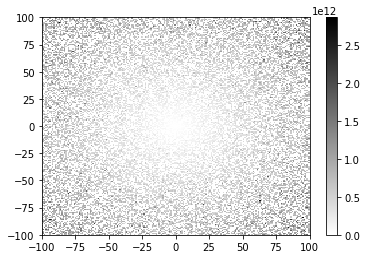

In [83]:
def func_plot(bounds, res):
    
    xmin, xmax, ymin, ymax = bounds
    
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    Z = np.empty((res, res))
    
    for i in range (0, len(x)):
        for j in range (0, len(y)):
            Z[i,j] = cond_eig(np.array(([1,x[i]],[y[j],1])))[1]
            
    plt.pcolormesh(x, y, Z, cmap='gray_r')
    plt.colorbar()
    plt.show()
    
    return

bounds = [-100, 100, -100, 100]
res = 200
func_plot(bounds, res)

Problem 5
==================

(100, 15)


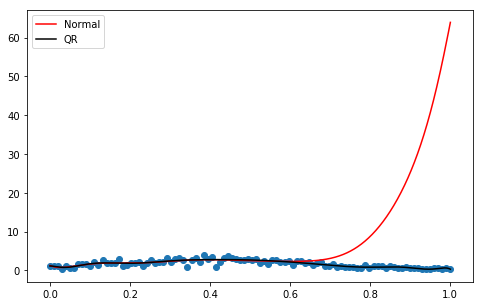

(152.14373083729362, 4.5683709417007901)


In [114]:
def prob5(n):
    
    import pylab

    pylab.rcParams['figure.figsize'] = (8, 5)
    
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    
    print(np.shape(A))
    
    xnormal = (sla.inv(A.T @ A)) @ A.T @ yk
    
    Q, R = sla.qr(A, mode ="economic")
    xqr = sla.solve_triangular(R, Q.T @ yk)
    
    x = np.linspace(min(xk), max(xk), 1000)
    
    ynorm = np.polyval(xnormal, x)
    yqr = np.polyval(xqr, x)
    
    plt.scatter(xk, yk)
    line1 = plt.plot(x, ynorm, 'r', label = "Normal")
    line2 = plt.plot(x, yqr,'k', label = "QR")
    plt.legend(loc = 'upper left')
    plt.show()
    
    normerror = la.norm(A @ xnormal - yk)
    qrerror = la.norm(A @ xqr - yk )
    
    return normerror, qrerror

print(prob5(14))

Problem 6
==================

[ 0.08387707  0.05901754  0.04554488  0.03708621  0.03127967  0.02704629
  0.02382273  0.02128604  0.01923775  0.01754917]
[  8.38770701e-02   5.90175409e-02  -1.04954455e+02  -4.47250891e+08
   4.07649256e+15  -1.04279013e+23   1.03635330e+31   2.77967319e+38
   9.36827504e+46  -6.94250215e+55]


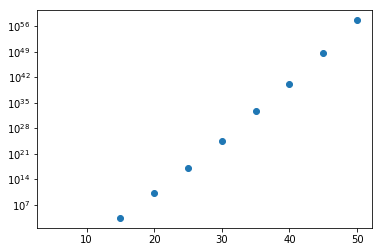

In [55]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt

def prob6():
    
    x = sy.symbols('x')
    n = sy.symbols('n')
    
    nvector = np.zeros(10)
    integrate_vec = np.empty_like(nvector)
    factorial_vec = np.empty_like(nvector)
    relative = np.empty_like(nvector)
    ivals = np.arange(1, 11, 1)
    n = 5
    nvals = ivals * 5
    
    for i in ivals:
        n += 5
        integrate_vec[i-1] = sy.integrate((x**n) * sy.exp(x-1), (x, 0, 1))
        factorial_vec[i-1] = float(((-1) ** n) * float(sy.subfactorial(n)) + ((-1)** (n + 1)) * (float(sy.factorial(n)) / sy.exp(1)))
        relative[i-1] = float((np.abs(integrate_vec[i-1] - factorial_vec[i-1])) / np.abs(integrate_vec[i-1]))
    print(integrate_vec)
    print(factorial_vec)
    plt.plot(nvals, relative, 'o', lw = 0)
    plt.yscale('log')
    plt.show()
    
    return

prob6()